In [1]:
from __future__ import division, print_function
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('./mlcourse/data/microchip_tests.txt',
header=None, names=('test1', 'test2', 'released'))

In [3]:
data['released'].unique()

array([1, 0])

In [4]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
X = data.iloc[:,:2].values
y = data['released'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
def print_scatter(title):
    plt.scatter(X[y == 1, 0], X[y==1,1], c='green', label='Выпущенные')
    plt.scatter(X[y == 0, 0], X[y==0,1], c='red', label='Бракованные')
    plt.xlabel('Test1')
    plt.ylabel('Test2')
    plt.title(title)
    plt.legend();

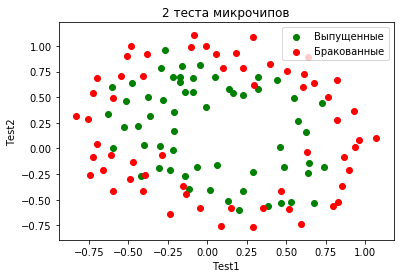

In [7]:
print_scatter('2 теста микрочипов')
# X[y == 0, 1].shape

In [8]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))


    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [9]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)
X_poly
# X_poly.shape

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         4.40352691e-04,  6.00879959e-03,  8.19926237e-02],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.29662850e-03, -9.57616530e-03,  7.07241450e-02],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         7.26046625e-03, -2.35181216e-02,  7.61799619e-02],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.33836427e-01, -4.82331978e-01,  9.94901177e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00036314e-05, -6.30869717e-03,  9.94901177e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
        -1.07593379e-08,  5.20611480e-10, -2.51907984e-11]])

Доля правильных ответов классификатора на обучающей выборке: 0.627


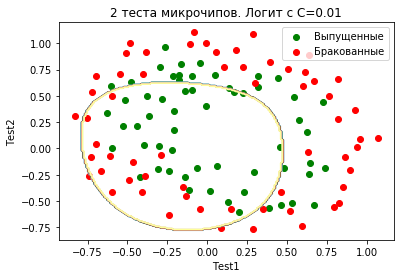

In [10]:
C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)
print_scatter('2 теста микрочипов. Логит с C=0.01')

print("Доля правильных ответов классификатора на обучающей выборке:", 
      round(logit.score(X_poly, y), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.831


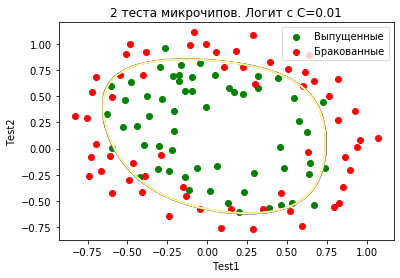

In [11]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

print_scatter('2 теста микрочипов. Логит с C=0.01')

print("Доля правильных ответов классификатора на обучающей выборке:", 
      round(logit.score(X_poly, y), 3))


Доля правильных ответов классификатора на обучающей выборке: 0.873


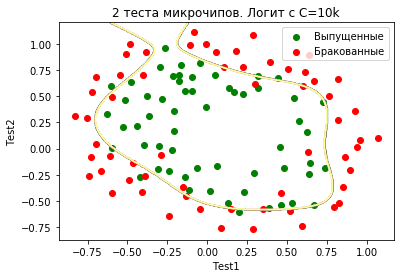

In [12]:
C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

print_scatter('2 теста микрочипов. Логит с C=10k')
print("Доля правильных ответов классификатора на обучающей выборке:", 
      round(logit.score(X_poly, y), 3))


In [13]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.3s finished


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=1)

In [14]:
logit_searcher.C_

array([150.78450459])

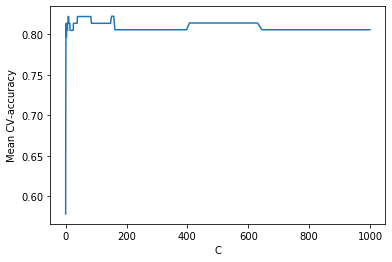

In [15]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');

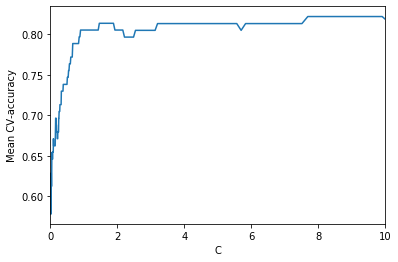

In [16]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy');
plt.xlim((0,10));